# Random Gabor experiment

> In this quick experiment we will be training an MNIST classifier using `RandomGaussian` layers.

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

## Library importing

In [ ]:
#| hide
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from flayers.center_surround import RandomGaussian

## Data loading

> We will be using MNIST for a simple and quick test.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = repeat(X_train, "b h w ->  b h w c", c=1)/255.0
X_test = repeat(X_test, "b h w ->  b h w c", c=1)/255.0

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

## Definition of simple model

In [ ]:
model = tf.keras.Sequential([
    RandomGaussian(filters=4, size=20, input_shape=(28,28,1)),
    # layers.Conv2D(32, 3, input_shape=(28,28,1)),
    layers.MaxPool2D(2),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

2022-10-03 11:31:53.209266: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5435 MB memory:  -> device: 0, name: NVIDIA GeForce GTX TITAN Black, pci bus id: 0000:83:00.0, compute capability: 3.5
2022-10-03 11:31:55.600853: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-03 11:31:55.808779: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x55f6960d28c0


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_gaussian_1 (RandomGau (None, 28, 28, 4)         1622      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
Total params: 1,672
Trainable params: 72
Non-trainable params: 1,600
_________________________________________________________________


We can show the initial Gabor filters:

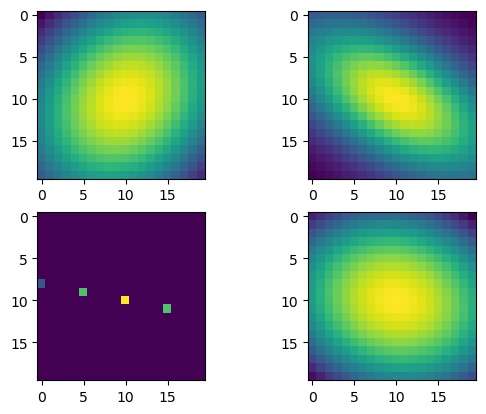

In [ ]:
model.layers[0].show_filters()

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=1, validation_split=0.2)

2022-10-03 11:32:14.489107: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2022-10-03 11:32:14.952528: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


375/375 [==============================] - 16s 29ms/step - loss: 5.0562 - accuracy: 0.0970 - val_loss: 2.6497 - val_accuracy: 0.1008


We can visualize the gabor filters after the training process:

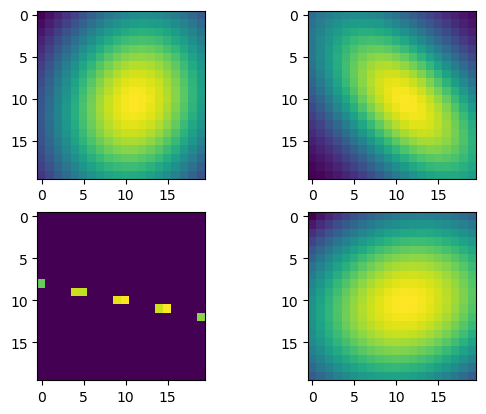

In [ ]:
model.layers[0].show_filters()